In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
df0 = pd.read_csv("data/results_predict_all_0.0.txt", sep="\t")
df4 = pd.read_csv("data/results_predict_all_0.04.txt", sep="\t")
df8 = pd.read_csv("data/results_predict_all_0.08.txt", sep="\t")
df12 = pd.read_csv("data/results_predict_all_0.12.txt", sep="\t")
df16 = pd.read_csv("data/results_predict_all_0.16.txt", sep="\t")
df20 = pd.read_csv("data/results_predict_all_0.2.txt", sep="\t")


df = pd.concat((df0, df4, df8, df12, df16, df20), ignore_index=True)

In [12]:
df = df[df["col"] != -2]

In [13]:
df[df["col"] != 0] #all colisions

,scene_id,sigma,col,noise_norm,ade,fde
119,39,0.0,1,0.0,0.348683,0.623938
143,47,0.0,1,0.0,0.282354,0.810002
317,105,0.0,1,0.0,1.460181,3.883822
323,107,0.0,1,0.0,2.007343,4.037057
350,116,0.0,1,0.0,1.750261,3.631921
...,...,...,...,...,...,...
3077,1697,0.0,1,0.0,0.265883,0.347031
3080,1700,0.0,1,0.0,0.473006,0.970475
3083,1703,0.0,1,0.0,0.244897,0.490175
3085,1705,0.0,1,0.0,0.323007,0.714692


In [14]:
df_mean = df.groupby("sigma")[["col", "fde", "ade"]].mean()
df_mean

,col,fde,ade
sigma,,,
0.00,0.040725,1.144239,0.530816
0.04,0.000000,1.256223,0.615115
0.08,0.000000,1.351725,0.687097
0.12,0.000000,1.410530,0.737193
0.16,0.000000,1.480999,0.783000
0.20,0.000000,1.548048,0.840749


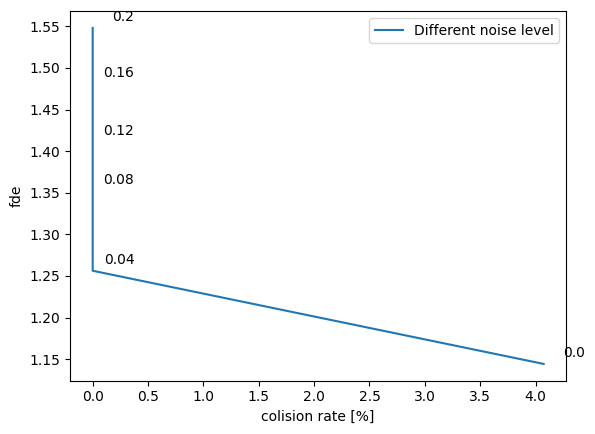

In [17]:
x = df_mean["col"]*100
y = df_mean["fde"]
plt.plot(x, y, label="Different noise level")
plt.ylabel("fde")
plt.xlabel("colision rate [%]")

# plt.ylim(top = 1.175)
# plt.xlim(right = 1)

#plt.axvline(0, color = "k")

plt.legend()



for i, (x,y) in enumerate(zip(x,y)):

    label = str(df_mean.index[i])

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(30,5), # distance from text to points (x,y)
                 ha='right')